                            OLS Regression Results                            
Dep. Variable:                  Taxes   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1036.
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           3.07e-54
Time:                        15:13:21   Log-Likelihood:                -777.35
No. Observations:                 100   AIC:                             1557.
Df Residuals:                      99   BIC:                             1559.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price          0.0134      0.000     32.184      0.0

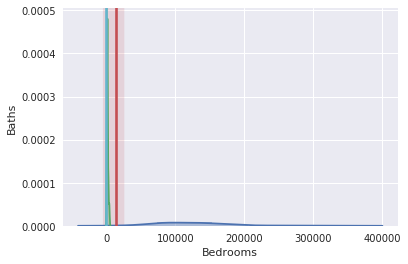

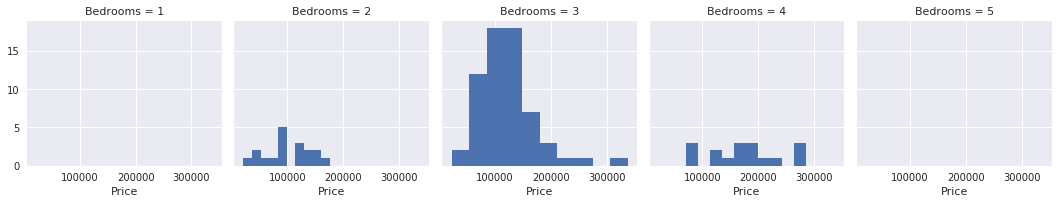

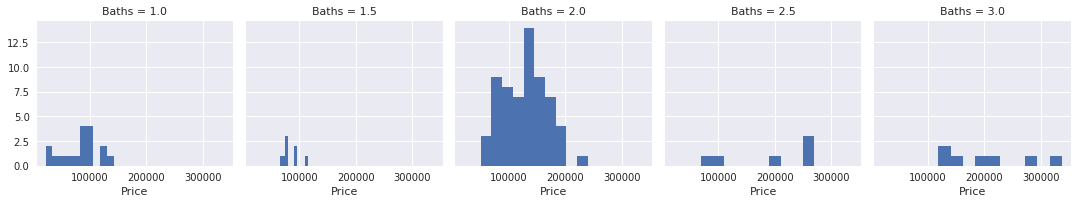

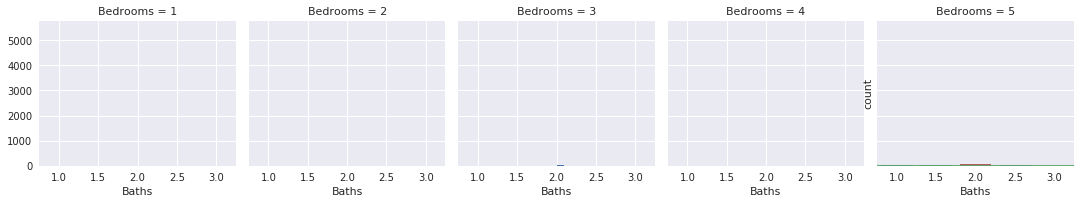

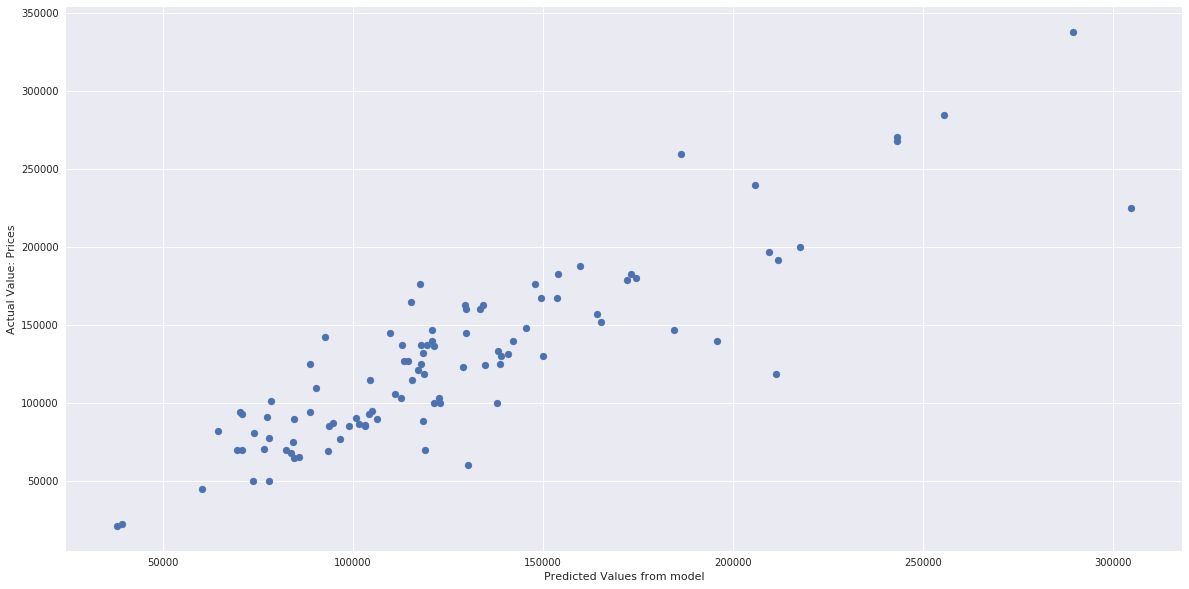

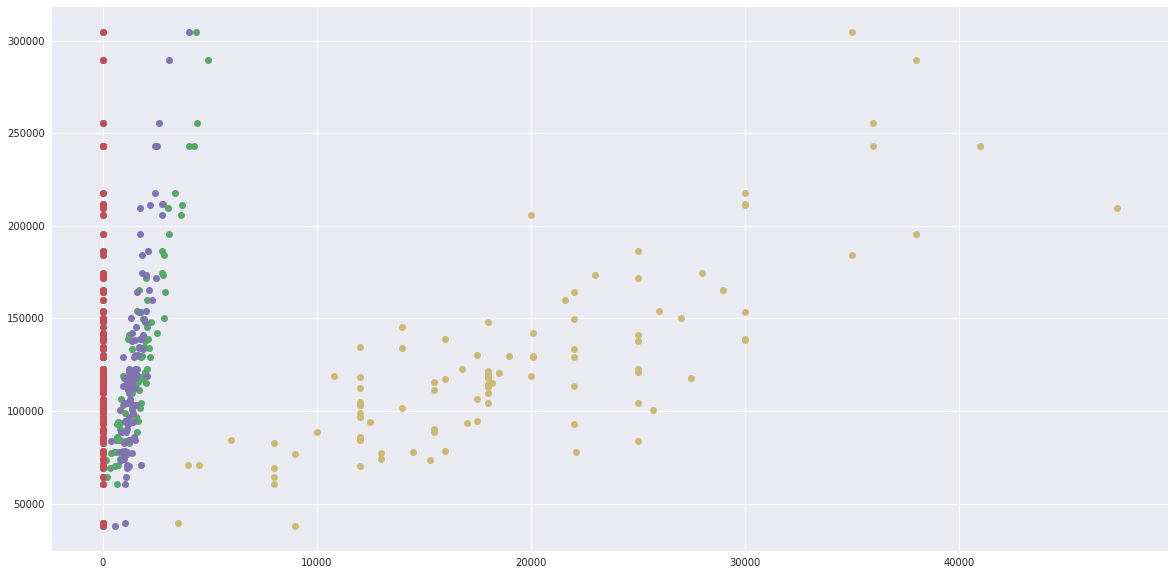

0    145000
1     68000
2    115000
3     69000
4    163000
Name: Price, dtype: int64

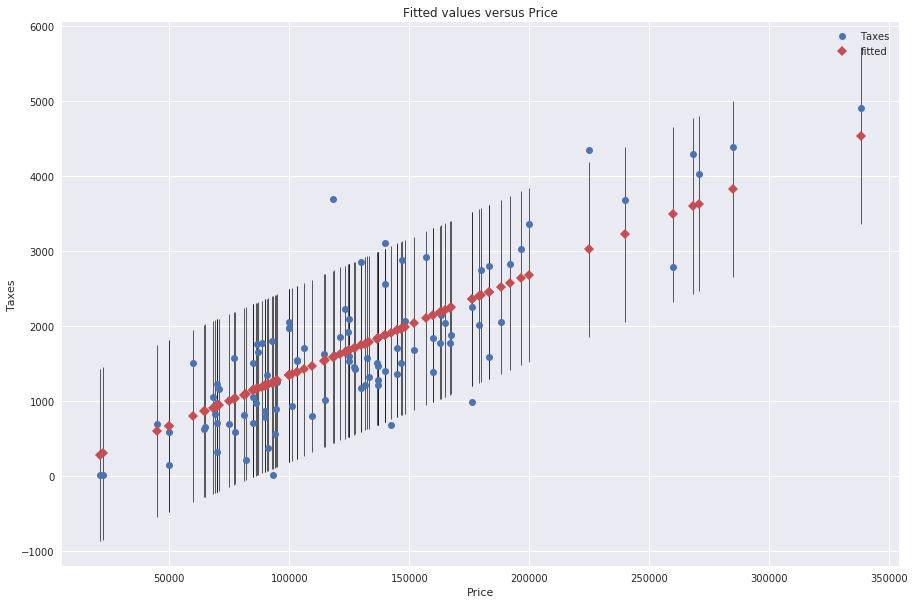

In [5]:
# From April 11th
#importing pandas
import pandas as pd
#read in the housing data
df = pd.read_csv('../April2-4/house_selling_prices.csv')
df.head()

get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm

#Plot the distribution for Price
sns.distplot(df["Price"])

#Calculate the Kolmogorov–Smirnov statistic to test for normality
df_price = df["Price"]
stats.kstest(df_price, 'norm', norm.fit(df["Price"]))

#Plot the distribtion for Taxes
sns.distplot(df["Taxes"])

#Plot the Regression for Taxes vs Prices
sns.regplot(x=df["Price"], y=df["Taxes"])

#Plot the regression for Prices vs Bedrooms
sns.regplot(x=df["Price"], y=df["Bedrooms"])

#Plot the regression for Price vs Baths
sns.regplot(x=df["Price"], y=df["Baths"])

#Plot the regression for Bedrooms vs Baths
sns.regplot(x=df["Bedrooms"], y=df["Baths"])

import matplotlib.pyplot as plt

#Plot small multiples for Price with Number of Bedrooms 
multiples = sns.FacetGrid(df, col = "Bedrooms")
multiples = multiples.map(plt.hist, "Price")

#Plot the small multiples for Price vs Number of Baths
multiples = sns.FacetGrid(df, col = "Baths")
multiples = multiples.map(plt.hist, "Price")

#Plot the small multiples for Baths vs Bedrooms
multiples = sns.FacetGrid(df, col = "Bedrooms")
multiples = multiples.map(plt.hist, "Baths")

sns.regplot(x='Price', y='Taxes', data=df)

df["Price"].describe()

sns.distplot(df["Price"])

bedroom_count = df["Bedrooms"].value_counts()
sns.countplot(df["Bedrooms"])

sns.countplot(df["Baths"])

df.head()

import statsmodels.api as sm

X = df["Price"]
Y = df["Taxes"]

model = sm.OLS(Y,X).fit()
print(model.summary())

df.head()

Y = df["Price"]
X = df[["Bedrooms", "Taxes", "Baths", "Size", "Lot"]]

model = sm.OLS(Y,X).fit()
print(model.summary())

predictions = model.predict(X)
plt.figure(figsize = (20,10))
plt.scatter(predictions, Y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: Prices")
plt.show()

plt.figure(figsize=(20,10))
plt.plot(X, model.fittedvalues, 'o')
plt.show()

X = df["Price"]
Y = df["Taxes"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)

predictions.head()

df["Price"].head()

In [11]:
predictors = pd.Series([3, 1600, 2, 1300, 20000])
pred_df = pd.DataFrame([predictors.values], columns=['Bedrooms', 'Taxes', 'Baths', 'Size', 'Lot'], dtype='float')
pred_df

,Bedrooms,Taxes,Baths,Size,Lot
0,3.0,1600.0,2.0,1300.0,20000.0


In [13]:
multi_model.predict(pred_df)

0    119996.84393
dtype: float64

In [18]:
import sklearn.cross_validation

# Train, test, and split using the data
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size=0.2, random_state=5)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80,)
(80,)
(20,)
(20,)


In [20]:
from sklearn.linear_model import LinearRegression

# Build a linear model and predict
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_train)

ValueError: Expected 2D array, got 1D array instead:
array=[147000  93000 142500 100000 240000 103000 225000 103000  92900 118300
  50000  94300 136500 118600  95000  75000 183000 137000 260000  87000
 179000  65000 188000 101000 167500  85000 176000  69000 183000 167000
  88400  60000 156900  70000  93900 151800 270500 162600 200000 133000
 125000 100000 140000 115000  86500 105900  81000  77300 163000 145000
 131500  69900 196500  68000 124900 146500  70000  90000 285000  86000
 268000 192000 123000  77000  45000 165000  85000  50000 130000 137000
  69900 176000 140000 124500 121300 140000  85000  91200  21000 127200].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Plot the predicted values against the actual values
plt.figure(figsize=(20,10))
plt.scatter(Y_test, Y_pred)

In [ ]:
# Mean squared error
mse = sklearn.metrics.mean_squared_error(X_train, Y_pred)
print(mse)

In [ ]:
# Predict on the "new" data
X_pred = lm.predict(Y_train)

In [ ]:
# Mean squared error
mse = sklearn.metrics.mean_squared_error(X_test, Y_pred)
print(mse)